# Li-Daie-2016 - A DataJoint example
The data and results presented in this notebook pertain to the paper:

>Nuo Li, Kayvon Daie, Karel Svoboda & Shaul Druckmann. "Robust neuronal dynamics in premotor cortex during motor planning" (2016) Nature (https://dx.doi.org/10.1038/nature17643)

This notebook provide demonstrations of working with a DataJoint data pipeline in querying data, apply data conditioning and reproduce some key figures in the paper. The orignal data , in NWB 2.0 format, had been ingested into a DataJoint data pipeline (data pipeline schema is given below). As a validation of complete ingestion of the original data into DataJoint, figures 2b, 2c, and extended figure 2 will be reproduced in this example.

In [1]:
%matplotlib inline
import os
os.chdir('..')

In [2]:
import datajoint as dj
dj.conn().connect()

Connecting root@127.0.0.1:3306


In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, psth
from pipeline.plot import unit_characteristic_plot, unit_psth

In [4]:
import warnings
warnings.filterwarnings('ignore')

##  Firing rate change from control induced by photoinhibition - Figure 1

In [5]:
subjects = lab.Subject & [{'subject_id': 255200},
                          {'subject_id': 255203},
                          {'subject_id': 255201},
                          {'subject_id': 257772},
                          {'subject_id': 258250}]

In [6]:
units = ephys.Unit & [{'subject_id': 255201, 'session': 6, 'unit': 16},
                      {'subject_id': 255201, 'session': 5, 'unit': 11},
                      {'subject_id': 255201, 'session': 5, 'unit': 2}]

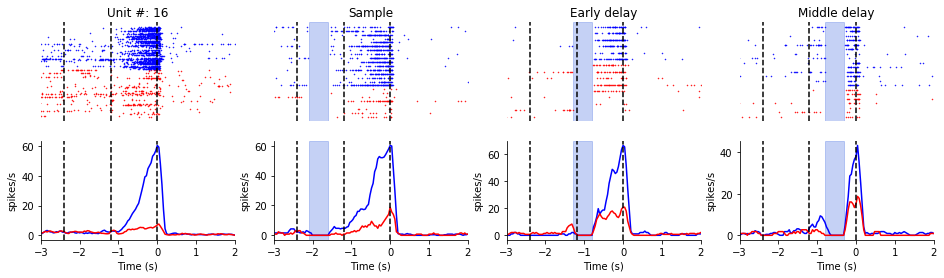

In [7]:
unit =  (ephys.Unit & {'subject_id': 255201, 'session': 6, 'unit': 16}).fetch1('KEY')
fig, axes = plt.subplots(2, 4, figsize=(16,4))
for axs, kw, title in zip(axes.T, (['good_noearlylick_', '_hit'], ['left_alm', 'sample'],
                          ['left_alm', 'early_delay'], ['left_alm', 'middle_delay']), 
                         ('', 'Sample', 'Early delay', 'Middle delay')):
    unit_psth.plot_unit_psth(unit, condition_name_kw=kw, axs=axs)
    if title:
        axs[0].set_title(title)

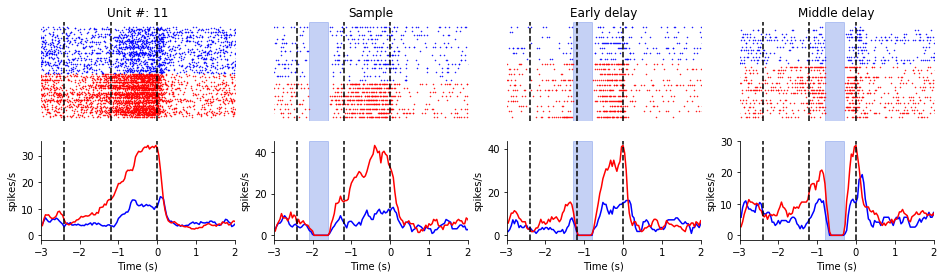

In [8]:
unit =  (ephys.Unit & {'subject_id': 255201, 'session': 5, 'unit': 11}).fetch1('KEY')
fig, axes = plt.subplots(2, 4, figsize=(16,4))
for axs, kw, title in zip(axes.T, (['good_noearlylick_', '_hit'], ['left_alm', 'sample'],
                          ['left_alm', 'early_delay'], ['left_alm', 'middle_delay']), 
                         ('', 'Sample', 'Early delay', 'Middle delay')):
    unit_psth.plot_unit_psth(unit, condition_name_kw=kw, axs=axs)
    if title:
        axs[0].set_title(title)

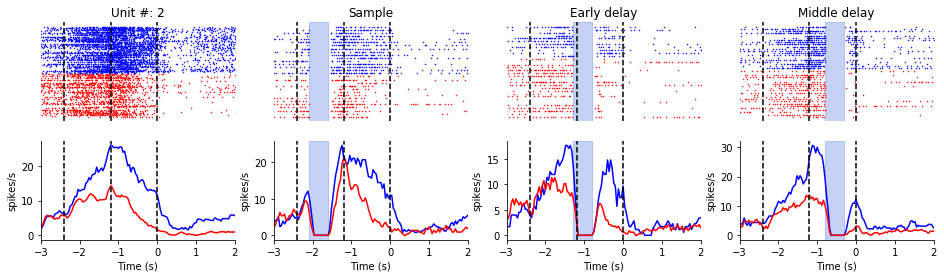

In [9]:
unit =  (ephys.Unit & {'subject_id': 255201, 'session': 5, 'unit': 2}).fetch1('KEY')
fig, axes = plt.subplots(2, 4, figsize=(16,4))
for axs, kw, title in zip(axes.T, (['good_noearlylick_', '_hit'], ['left_alm', 'sample'],
                          ['left_alm', 'early_delay'], ['left_alm', 'middle_delay']), 
                         ('', 'Sample', 'Early delay', 'Middle delay')):
    unit_psth.plot_unit_psth(unit, condition_name_kw=kw, axs=axs)
    if title:
        axs[0].set_title(title)

#### Photostimulation during `sample` period

In [10]:
subjects = lab.Subject & [{'subject_id': 255200},
                          {'subject_id': 255203},
                          {'subject_id': 255201},
                          {'subject_id': 257772},
                          {'subject_id': 258250}]

In [11]:
units = ephys.Unit & subjects

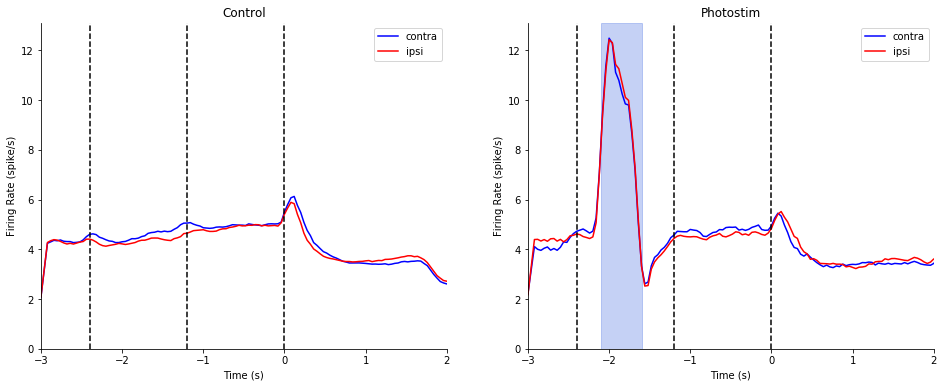

In [12]:
unit_characteristic_plot.plot_psth_photostim_effect(units, ['left_alm', 'sample'])

#### Photostimulation during `early delay` period

Found multiple stim durations: [0.5 0.8] - select 0.5


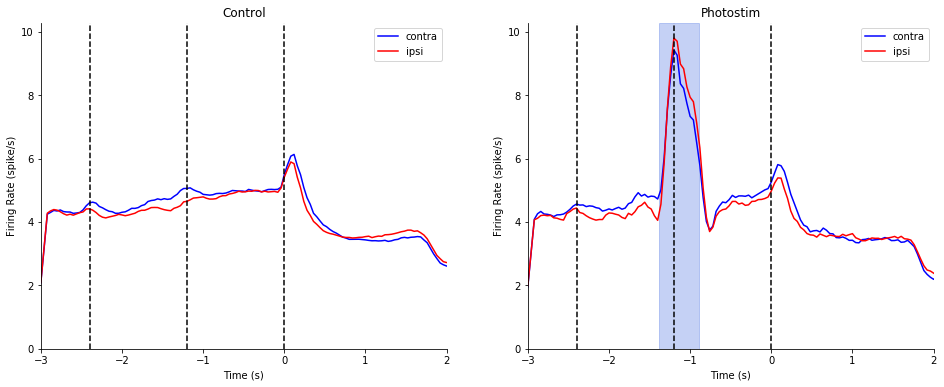

In [13]:
unit_characteristic_plot.plot_psth_photostim_effect(units, ['left_alm', 'early_delay'])

#### Photostimulation during `middle delay` period

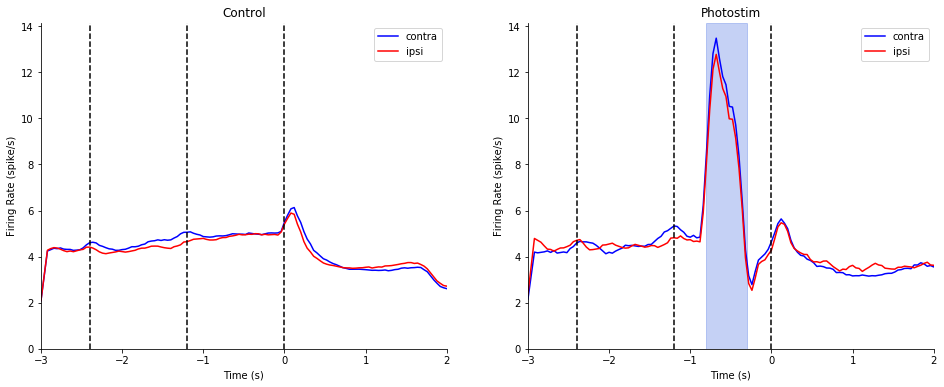

In [14]:
unit_characteristic_plot.plot_psth_photostim_effect(units, ['left_alm', 'middle_delay'])

# Plot single-unit spikes and PSTH 
Under left-ALM photostim effect in `Sample`, `Early delay` and `Middle delay`

In [15]:
unit_keys = (units & experiment.PhotostimEvent).fetch('KEY')

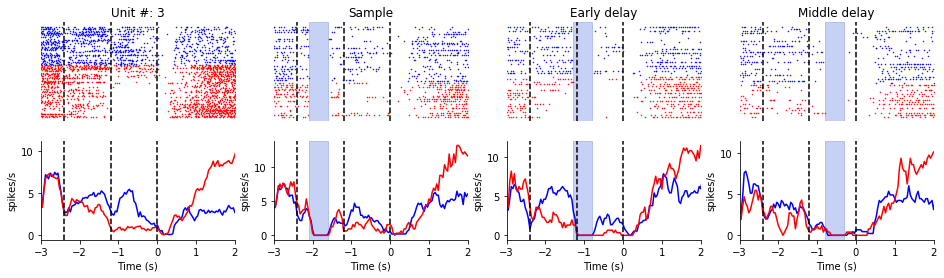

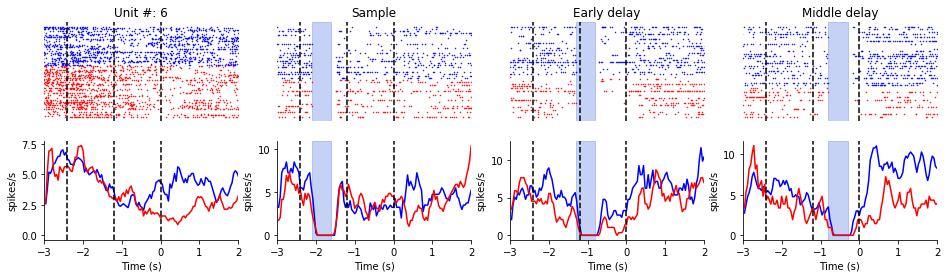

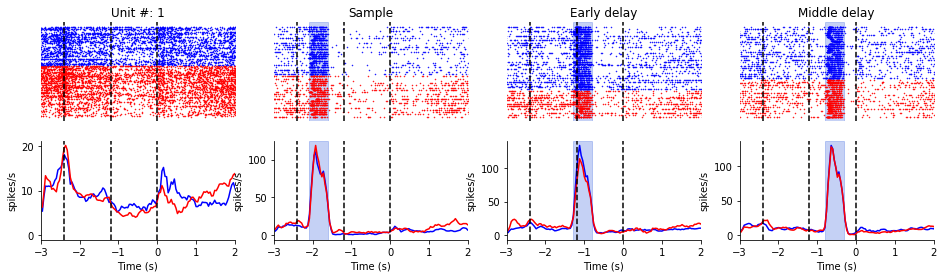

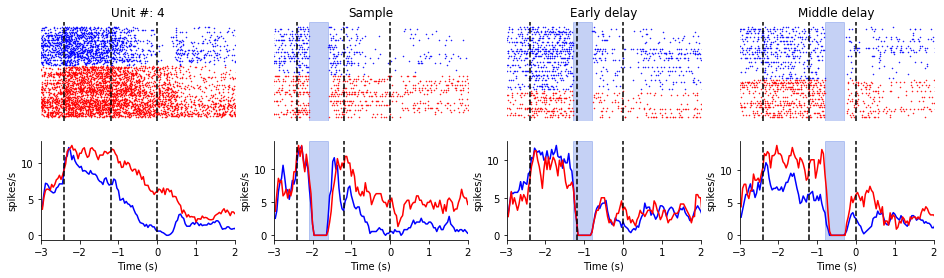

In [16]:
for unit in [unit_keys[k] for k in [2, 5, 12, 15]]:
    fig, axes = plt.subplots(2, 4, figsize=(16,4))
    for axs, kw, title in zip(axes.T, (['good_noearlylick_', '_hit'], ['left_alm', 'sample'],
                              ['left_alm', 'early_delay'], ['left_alm', 'middle_delay']), 
                             ('', 'Sample', 'Early delay', 'Middle delay')):
        unit_psth.plot_unit_psth(unit, condition_name_kw=kw, axs=axs)
        if title:
            axs[0].set_title(title)

# Plot single-unit spikes and PSTH 
Under ALM photostim effect in `Early delay` at `Ipsilateral`, `Contralateral` and `Bilateral`

First, find the units from sessions that underwent photostim at `left`, `right`, and `bilateral` ALM

In [17]:
left_alm_stim_units = units.proj() & (experiment.Photostim * experiment.BrainLocation & 'brain_location_name = "left_alm"')
right_alm_stim_units = units.proj() & (experiment.Photostim * experiment.BrainLocation & 'brain_location_name = "right_alm"')
both_alm_stim_units = units.proj() & (experiment.Photostim * experiment.BrainLocation & 'brain_location_name = "both_alm"')

In [18]:
unit_keys = (left_alm_stim_units * right_alm_stim_units * both_alm_stim_units).fetch('KEY')

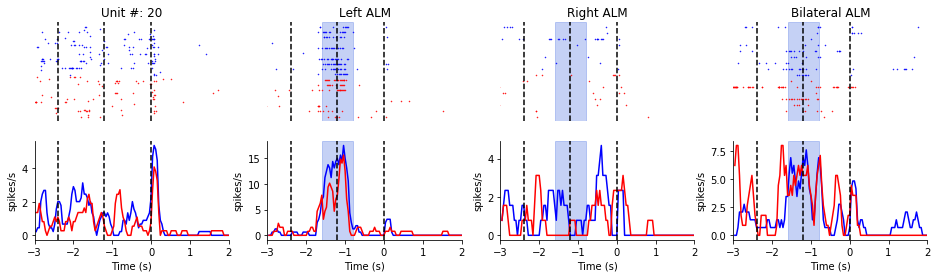

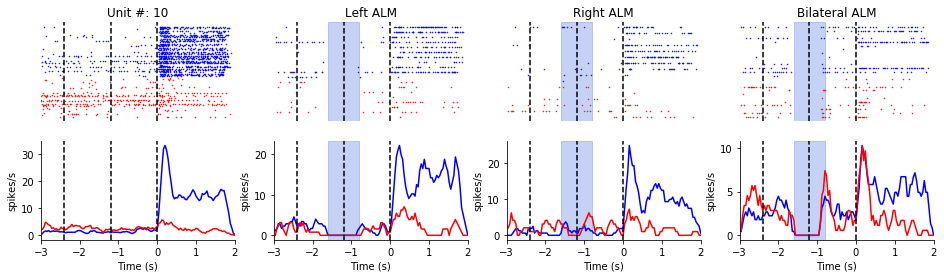

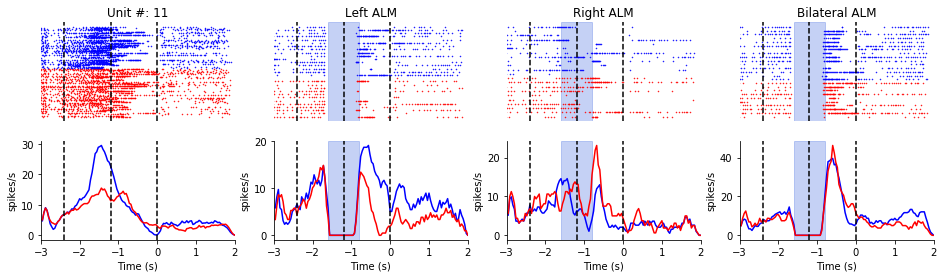

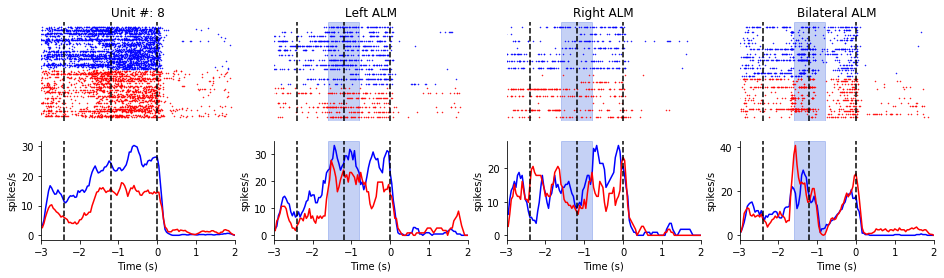

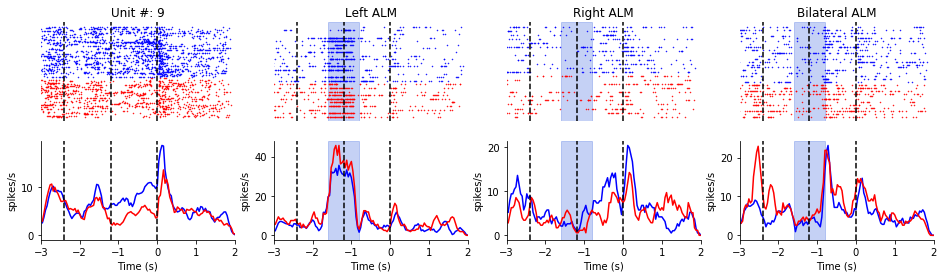

In [19]:
for unit in [unit_keys[k] for k in np.random.randint(len(unit_keys), size=(5,))]:
    fig, axes = plt.subplots(2, 4, figsize=(16,4))
    for axs, kw, title in zip(axes.T, (['good_noearlylick_', '_hit'], ['left_alm', 'early_delay'],
                              ['right_alm', 'early_delay'], ['both_alm', 'early_delay']), 
                             ('', 'Left ALM', 'Right ALM', 'Bilateral ALM')):
        unit_psth.plot_unit_psth(unit, condition_name_kw=kw, axs=axs)
        if title:
            axs[0].set_title(title)

# Plot population PSTH - with selectivity

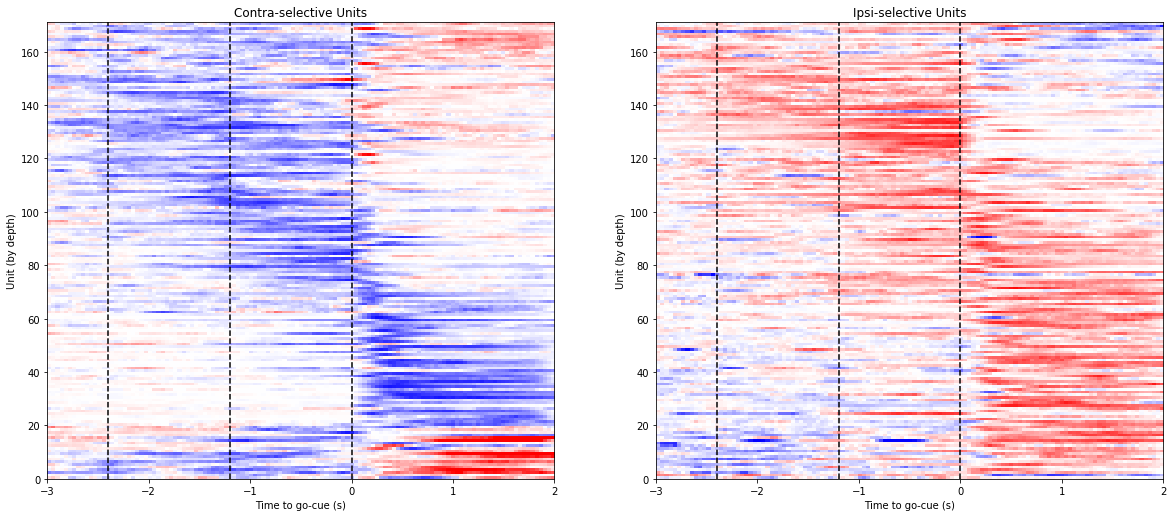

In [20]:
unit_characteristic_plot.plot_stacked_contra_ipsi_psth(units)

# =====================================================

In [21]:
import importlib
importlib.reload(unit_characteristic_plot)
importlib.reload(unit_psth)

<module 'pipeline.plot.unit_psth' from 'C:\\Users\\thinh\\Documents\\TN-Vathes\\NWB_Janelia\\Li-2015a\\pipeline\\plot\\unit_psth.py'>